<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/modelos/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### El método de k-mean

In [1]:
import numpy as np

In [2]:
data = np.random.random(90).reshape(30,3)
data

array([[0.73912177, 0.65181392, 0.25954873],
       [0.45305997, 0.67004641, 0.1616711 ],
       [0.68491831, 0.25427616, 0.3988626 ],
       [0.03361742, 0.93596783, 0.23606869],
       [0.36252483, 0.48976244, 0.9099889 ],
       [0.59101032, 0.30120101, 0.20427336],
       [0.92518519, 0.47759855, 0.7542538 ],
       [0.28455548, 0.35216039, 0.120667  ],
       [0.04757708, 0.55971708, 0.18502968],
       [0.76251846, 0.53744926, 0.51939431],
       [0.76032242, 0.5849202 , 0.60521436],
       [0.13340006, 0.36242641, 0.93853715],
       [0.10760558, 0.8174761 , 0.80685375],
       [0.96276593, 0.19106507, 0.89245122],
       [0.57747077, 0.04584019, 0.90731428],
       [0.33474258, 0.23065438, 0.85436338],
       [0.00376324, 0.44092834, 0.90599926],
       [0.03310871, 0.19102818, 0.51653024],
       [0.83729555, 0.54427215, 0.82920554],
       [0.27418239, 0.18962601, 0.02743262],
       [0.72553238, 0.20608732, 0.96287942],
       [0.17402891, 0.74069144, 0.44784404],
       [0.

In [3]:
# definiendo los centroides
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
cluster_centers = np.vstack([data[c1], data[c2]])
cluster_centers

array([[0.83729555, 0.54427215, 0.82920554],
       [0.17402891, 0.74069144, 0.44784404]])

In [4]:
from scipy.cluster.vq import vq


In [5]:
vq(data,cluster_centers)

(array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0], dtype=int32),
 array([0.58797297, 0.40588668, 0.54084337, 0.32046381, 0.48466947,
        0.65295636, 0.13337062, 0.51982431, 0.34323923, 0.31878075,
        0.24031059, 0.62089843, 0.37308968, 0.38012903, 0.56748949,
        0.59291527, 0.57337119, 0.57158201, 0.        , 0.70032107,
        0.38043224, 0.        , 0.4204971 , 0.13618858, 0.32693368,
        0.77365436, 0.3341796 , 0.23447872, 0.40873277, 0.32114036]))

In [6]:
from scipy.cluster.vq import kmeans

In [7]:
#info varicentros [[],[]] --- ,la suma de la distancia de los cuadrados
# conociendo los varicientros
kmeans(data, cluster_centers)

(array([[0.72075636, 0.42511094, 0.73787785],
        [0.23226299, 0.52024113, 0.39916096]]), 0.3794543065276386)

In [8]:
# o pasando el numero k
kmeans(data, 2)

(array([[0.68512567, 0.40808814, 0.77781835],
        [0.27885697, 0.54250171, 0.34693108]]), 0.37873264133325557)

Distribuciones en forma de anillos

Librerias

In [9]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Datos

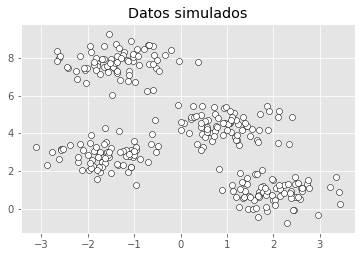

In [10]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

In [11]:
# Escalado de datos
# ==============================================================================
X_scaled = scale(X)

In [12]:
# Modelo
# ==============================================================================
X_scaled = scale(X)
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=123)

In [13]:
# Clasificación con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)

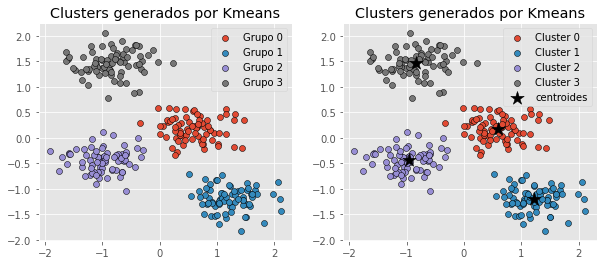

In [14]:
# Representación gráfica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Clusters generados por Kmeans')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();


In [15]:
# Matriz de confusión: grupos originales vs clusters creados
# ==============================================================================
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2,3
grupo_real,,,,
0,75,0,0,0
1,0,75,0,0
2,0,0,75,0
3,0,0,0,75


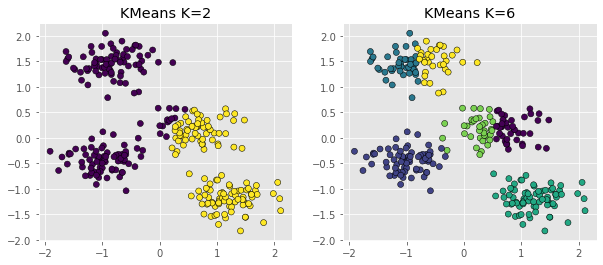

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

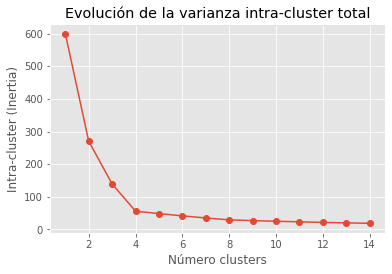

In [20]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1,15)
# suma total de varianza intracluster
inertias = []

for n_clusters in range_n_clusters:
  modelo_kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=123)
  modelo_kmeans.fit(X_scaled)
  inertias.append(modelo_kmeans.inertia_)


fig, ax = plt.subplots(1,1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title('Evolución de la varianza intra-cluster total')
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (Inertia)');


Text(0, 0.5, 'Media índices silhouette')

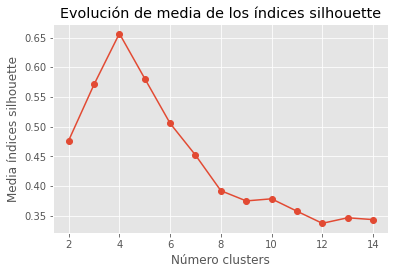

In [22]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2,15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
  modelo_kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=123)
  clusters_labels = modelo_kmeans.fit_predict(X_scaled)
  silhouette_avg = silhouette_score(X_scaled, clusters_labels)
  valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title('Evolución de media de los índices silhouette')
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

In [36]:
# Con iris data
# ==============================================================================
from sklearn.datasets import load_iris
iris = load_iris()
Y_iris = iris.target
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['Target'])

(150,)

Text(0, 0.5, 'Petal width')

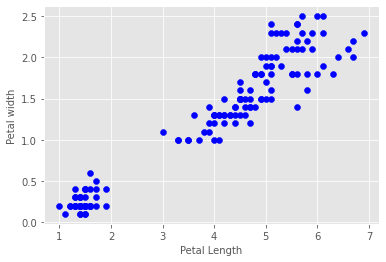

In [27]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c='blue')
plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal width', fontsize=10)

In [41]:
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(x)
y_labels = model.labels_

In [42]:
y_kmeans = model.predict(x)
print(f'Predicciones {y_kmeans}, {y_kmeans.shape}')

Predicciones [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2], (150,)


In [43]:
from sklearn import metrics
accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


Text(0, 0.5, 'Petal width')

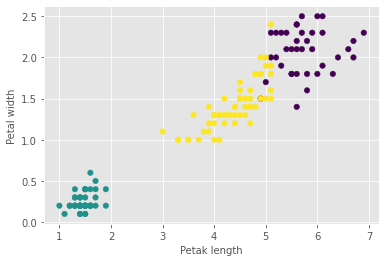

In [44]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=y_kmeans, s=30)
plt.xlabel('Petak length', fontsize=10)
plt.ylabel('Petal width', fontsize=10)